I have added two models model1, model 2 both have the same architecture. I have ran the first model in 5 epoch and obtained an accuracy of 99.32 and ran the second model in 10 epochs and obtained 99.51 accuracy. 


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
#tf version should be 2.2 or higher
tf.__version__

'2.3.0'

In [2]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#scale model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalizing the data to help with the training
train_images /= 255
test_images /= 255

train_images.shape

(60000, 28, 28, 1)

In [4]:
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(32, [5, 5],padding='same', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(center=True, scale=True,axis=-1),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(32, [5, 5]),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(64, [5, 5],padding='same'),
    keras.layers.BatchNormalization(center=True, scale=True,axis=-1),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, [5, 5]),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [5]:
optimizer = tf.keras.optimizers.SGD(lr=0.1, decay=0, momentum=0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels,epochs=5,batch_size=24,validation_split=0.1)

Epoch 1/5
2250/2250 [==============================] - 8s 4ms/step - loss: 0.2520 - accuracy: 0.9199 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 2/5
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0704 - accuracy: 0.9779 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 3/5
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 4/5
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0270 - val_accuracy: 0.9933
Epoch 5/5
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0359 - accuracy: 0.9893 - val_loss: 0.0256 - val_accuracy: 0.9935


In [7]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9932

Test accuracy: 0.9932000041007996


In [8]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

In [9]:
#Raw predictions
predictions

array([[5.73811683e-08, 2.21848637e-08, 1.04914272e-06, 6.68270275e-08,
        3.61912789e-09, 1.42838745e-08, 8.24673732e-11, 9.99998093e-01,
        5.97713967e-09, 6.84610939e-07],
       [9.16599106e-07, 7.96050585e-07, 9.99991298e-01, 2.19735924e-07,
        2.67303477e-07, 9.21368493e-09, 5.22397158e-06, 8.00963491e-08,
        9.39049073e-07, 3.02344461e-07],
       [9.83490906e-08, 9.99998331e-01, 1.77267424e-07, 5.64570701e-09,
        3.35009922e-08, 9.02137103e-08, 1.11341926e-07, 7.35570552e-07,
        3.66203494e-07, 2.05620374e-08],
       [9.99998212e-01, 1.92435234e-10, 9.12937337e-10, 2.45882537e-10,
        4.20956825e-09, 6.76428558e-09, 5.67412030e-07, 1.37891631e-09,
        1.00068291e-08, 1.22276606e-06],
       [7.93463162e-09, 3.04678963e-07, 5.50593748e-09, 1.43018353e-09,
        9.99857068e-01, 1.08949489e-08, 7.53493481e-08, 1.00245046e-07,
        6.76309924e-07, 1.41753437e-04]], dtype=float32)

In [10]:
# Print our model's predictions
print(np.argmax(predictions, axis=1))

[7 2 1 0 4]


In [11]:
# Check our predictions against the ground truths
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


313/313 - 1s - loss: 0.0225 - accuracy: 0.9932


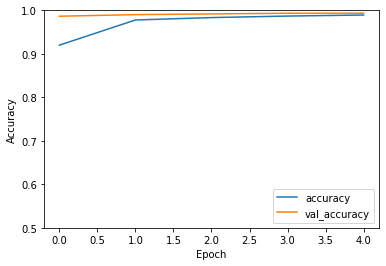

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0225 - accuracy: 0.9932


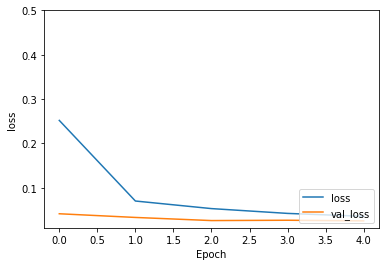

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')

plt.ylabel('loss')
plt.ylim([0.01, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
model1 = keras.Sequential([
    keras.layers.Conv2D(32, [5, 5],padding='same', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(center=True, scale=True,axis=-1),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(32, [5, 5]),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(64, [5, 5],padding='same'),
    keras.layers.BatchNormalization(center=True, scale=True,axis=-1),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, [5, 5]),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
    
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)       

In [15]:
optimizer = tf.keras.optimizers.SGD(lr=0.1, decay=0, momentum=0)
model1.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [16]:
history = model1.fit(train_images, train_labels,epochs=10,batch_size=24,validation_split=0.1)

Epoch 1/10
2250/2250 [==============================] - 8s 4ms/step - loss: 0.1878 - accuracy: 0.9414 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 2/10
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0299 - val_accuracy: 0.9922
Epoch 3/10
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0439 - accuracy: 0.9868 - val_loss: 0.0268 - val_accuracy: 0.9917
Epoch 4/10
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 5/10
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0233 - val_accuracy: 0.9942
Epoch 6/10
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0205 - val_accuracy: 0.9937
Epoch 7/10
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0237 - val_accuracy:

In [17]:
#evaluate
test_loss, test_acc = model1.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0157 - accuracy: 0.9951

Test accuracy: 0.9951000213623047


In [18]:
predictions = model1.predict(test_images[:5])

In [19]:
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]


313/313 - 1s - loss: 0.0157 - accuracy: 0.9951


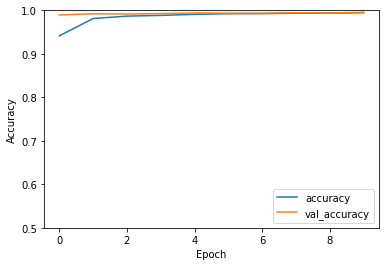

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0157 - accuracy: 0.9951


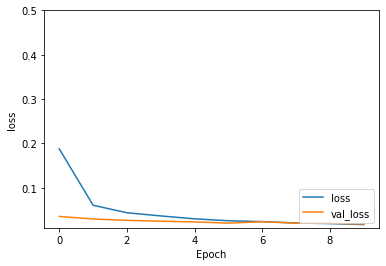

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')

plt.ylabel('loss')
plt.ylim([0.01, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)